# Do short term rates such as the 1 month and 3 month contribute to the 10 year in the US Yield Curve?

Data source:  https://catalog.data.gov/dataset/interest-rate-statistics-daily-treasury-yield-curve-rates

# At the end, I will ask if there is a better model to improve the results

In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
#load the file . . . not included is the code to covert the file to json format
sample_json_df = pd.read_json('/Users/lacivert/loans.json')

#assign DataFrame
df = pd.DataFrame(sample_json_df)

In [3]:
#list column names to display the variables for anaylsis
list(df.columns.values)

['10yr', '1mo', '3mo']

In [4]:
#sanity check
df.head()

,10yr,1mo,3mo
0,5.070,3.670,3.540
1,5.110,3.650,3.530
2,5.170,3.650,3.530
3,5.200,3.630,3.520
4,5.190,3.620,3.520


In [5]:
# Setting up my variables
ten_year, one_month, three_month = df.loc[:,'10yr'], df.loc[:,'1mo'], df.loc[:,'3mo']

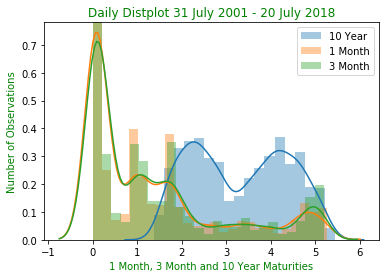

In [6]:
# Visualizing my variables and it is somewhat normal and somewhat not
sns.distplot(ten_year, label='10 Year')
sns.distplot(one_month,label='1 Month')
sns.distplot(three_month,label='3 Month')
plt.xlabel('1 Month, 3 Month and 10 Year Maturities',color='green')
plt.ylabel('Number of Observations',color='green')
plt.title('Daily Distplot 31 July 2001 - 20 July 2018', color='green')
plt.legend()

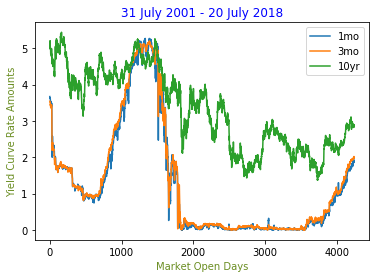

In [7]:
plt.plot (one_month)
plt.plot (three_month)
plt.plot (ten_year)
plt.xlabel ('Market Open Days', color='olivedrab')
plt.ylabel ('Yield Curve Rate Amounts', color='olivedrab')
plt.title ('31 July 2001 - 20 July 2018', color='blue')
plt.legend()

# the line plot above demonstrates a lot correlation between the short rates, but lets see what happens

In [8]:
# Instantiate and fit our model 
# with the dependent variable as the 10 year and (so called) independent variables as 1 month and 3 month
regr = linear_model.LinearRegression()
Y = df['10yr']
X = df[['1mo','3mo']]
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
# Inspect the results . . . 
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [0.03483721 0.47890829]

Intercept: 
 2.6478372830098165

R-squared:
0.5415955903056106


# Y = 2.6478 + 0.0348 Beta1 + 0.4789 Beta2 + Residual


# A one unit increase in the one month Beta1 increases the ten year, Y, by 0.0348, holding Beta2 constant


# A one unit increase in the three month Beta2 increases the ten year, Y, by 0.4789, holding Beta1 constant


# R squared is not near zero, which is good as a goodness of fit model, but should be near one to explain the variance in the outcome variable

In [10]:
# normality testing . . . a normal distribution has skewness of zero so not bad
from scipy.stats import skew
from scipy.stats import kurtosis
skew (one_month), skew (three_month), skew (ten_year)

(1.3123503068846365, 1.2682673047692128, 0.05745813024116081)

In [11]:
# normal distribution has kurtosis of three . . . we have a fat tail problem
kurtosis (one_month), kurtosis (three_month), kurtosis (ten_year)

(0.5876129698507286, 0.44303931310769773, -1.3130931069192109)

In [12]:
# Jacques Bera test of Normality and goodness of fit 
# Large results away from zero in the first set demonstrates a substantial deviation from a normal distribution 
from scipy import stats
stats.jarque_bera(one_month), stats.jarque_bera(three_month), stats.jarque_bera(ten_year)

((1278.9714349747903, 0.0),
 (1172.1803127649432, 0.0),
 (307.1612456774129, 0.0))

In [13]:
# Another problem are zero rates, especially in the one month with 88 of them  
np.count_nonzero(one_month == 0), np.count_nonzero(three_month == 0), np.count_nonzero(ten_year == 0)

(88, 16, 0)

# Which direction should I go to correct the above . . . to address the correlation of the 1 month and 3 month independent variables, non - normal distribution and zero interest rates


# (1) Do Principle Components Analysis on the entire US Yield Curve to remove correlations, . . . then re-run the multiple regression


# (2) Use Generalized Linear Regression to capture non - normality of the rate distributions . . . and then address correlations of the short term rates by dropping one of them, . . . thereby running a single independent variable regression on the 10 year


# I can code both above, but it just requires some time . . . What do you think?